In [13]:
from ucimlrepo import fetch_ucirepo 
  
# fetch dataset 
drug_consumption_quantified = fetch_ucirepo(id=373) 
  
# data (as pandas dataframes) 
X = drug_consumption_quantified.data.features 
y = drug_consumption_quantified.data.targets 
feature_names = X.columns.tolist()
  
# metadata 
print(drug_consumption_quantified.metadata) 
  
# variable information 
print(drug_consumption_quantified.variables) 


{'uci_id': 373, 'name': 'Drug Consumption (Quantified)', 'repository_url': 'https://archive.ics.uci.edu/dataset/373/drug+consumption+quantified', 'data_url': 'https://archive.ics.uci.edu/static/public/373/data.csv', 'abstract': 'Classify type of drug consumer by personality data', 'area': 'Social Science', 'tasks': ['Classification'], 'characteristics': ['Multivariate'], 'num_instances': 1885, 'num_features': 12, 'feature_types': ['Real'], 'demographics': ['Age', 'Gender', 'Education Level', 'Nationality', 'Ethnicity'], 'target_col': ['alcohol', 'amphet', 'amyl', 'benzos', 'caff', 'cannabis', 'choc', 'coke', 'crack', 'ecstasy', 'heroin', 'ketamine', 'legalh', 'lsd', 'meth', 'mushrooms', 'nicotine', 'semer', 'vsa'], 'index_col': ['id'], 'has_missing_values': 'no', 'missing_values_symbol': None, 'year_of_dataset_creation': 2015, 'last_updated': 'Fri Mar 08 2024', 'dataset_doi': '10.24432/C5TC7S', 'creators': ['Elaine Fehrman', 'Vincent Egan', 'Evgeny Mirkes'], 'intro_paper': {'ID': 413, 

In [14]:
feature_names

['age',
 'gender',
 'education',
 'country',
 'ethnicity',
 'nscore',
 'escore',
 'oscore',
 'ascore',
 'cscore',
 'impuslive',
 'ss']

In [15]:
import pandas as pd


bins = pd.qcut(X['age'], q=20, labels=False, duplicates='drop')

# Create an empty list to hold the grouped data
grouped_data = []

# Iterate over each bin (0 to 19), and select samples that belong to that bin
for i in range(len(set(bins))):  # Use the unique values in 'bins' for iterations
    group = X[bins == i]  # Select all rows in the current bin
    grouped_data.append(group.drop(columns=['age']).to_numpy())



In [16]:
feature_names.remove('age')

In [17]:
datasets = grouped_data

In [18]:
from src.ocsmm.OneClassSMMClassifier import OneClassSMMClassifier

In [19]:
classifier = OneClassSMMClassifier(nu=0.2)

In [20]:
classifier.fit(datasets)

In [22]:
datasets

[array([[-0.48246,  1.98437,  0.96082, ..., -0.14277, -0.71126, -0.21575],
        [ 0.48246,  1.16365,  0.96082, ...,  0.58489, -1.37983, -1.18084],
        [ 0.48246,  0.45468,  0.96082, ...,  1.81175,  0.19268,  0.07987],
        ...,
        [ 0.48246,  0.45468, -0.57009, ..., -1.38502,  0.52975, -0.52593],
        [ 0.48246, -0.61113, -0.57009, ..., -2.57309,  1.29221,  1.2247 ],
        [-0.48246, -0.61113,  0.21128, ...,  0.41594,  0.88113,  1.2247 ]]),
 array([[ 0.48246, -0.05921,  0.96082, ..., -0.00665, -0.21712, -1.18084],
        [-0.48246, -0.05921,  0.96082, ..., -1.0145 , -1.37983,  0.40148],
        [ 0.48246,  1.98437,  0.96082, ...,  1.30612, -0.21712, -0.21575],
        ...,
        [-0.48246, -1.7379 , -0.57009, ..., -0.14277, -0.21712, -0.84637],
        [-0.48246, -0.05921, -0.28519, ...,  0.12331, -0.71126,  0.40148],
        [-0.48246, -0.61113, -0.28519, ...,  0.12331, -0.21712,  0.7654 ]]),
 array([[-0.48246,  1.16365, -0.57009, ...,  0.93949, -0.21712,  0.079

In [23]:
decision, y_pred = classifier.predict(datasets)

AxisError: axis 1 is out of bounds for array of dimension 1

In [ ]:
y_pred

array([ 1.,  1.,  1., -1., -1.])

In [ ]:
decision

array([ 95.54467428,  16.82717277,   6.91182552, -40.3693588 ,
       -78.91431377])

In [10]:
outlier_indices = [i for i, value in enumerate(y_pred) if value == -1]
outlier_indices

NameError: name 'y_pred' is not defined

In [13]:
from src.explanation_algorithms.OCSMMSHAP import OCSMMSHAP
ocsmm_shap = OCSMMSHAP(X=datasets, classifier=classifier, decision=decision)
ocsmm_shap.fit_ocsmmshap(X=datasets, num_coalitions=2**datasets[0].shape[1])

c:\Users\swath\Documents\CISPA\OCSVM-SHAP\src\utils\shapley_procedure\coalitions.py:19: RuntimeWarning: divide by zero encountered in log2
  set_to_1 = np.floor(np.log2(rest)).astype(int)
c:\Users\swath\Documents\CISPA\OCSVM-SHAP\src\utils\shapley_procedure\coalitions.py:19: RuntimeWarning: invalid value encountered in cast
  set_to_1 = np.floor(np.log2(rest)).astype(int)
c:\Users\swath\Documents\CISPA\OCSVM-SHAP\src\utils\shapley_procedure\coalitions.py:19: RuntimeWarning: invalid value encountered in log2
  set_to_1 = np.floor(np.log2(rest)).astype(int)
100%|██████████| 2047/2047 [03:31<00:00,  9.67it/s]


In [18]:
mean_stochastic_shapley_values = ocsmm_shap.return_deterministic_shapley_values()

In [19]:
feature_names

['gender',
 'education',
 'country',
 'ethnicity',
 'nscore',
 'escore',
 'oscore',
 'ascore',
 'cscore',
 'impuslive',
 'ss']

In [23]:
mean_stochastic_shapley_values

tensor([[ -0.2117,   4.2357,   1.9294,  -3.3877,  -2.5980],
        [ 11.0792,   2.7978,  -1.1469,  -3.4821,  -9.5343],
        [ 11.6284,  -1.7450,  -2.6945,  -3.3448,  -4.4079],
        [  0.7806,   0.4292,   0.0775,  -0.2323,  -0.1969],
        [  9.8891,   6.3794,   0.6410,  -8.3567,  -8.8477],
        [ 11.4453,   2.3287,   1.4134,  -5.3129, -10.0836],
        [ 11.3538,  -0.3146,   1.5536,  -3.2074,  -9.4428],
        [  4.1677,   0.5207,   3.6763,  -1.5368,  -6.3303],
        [ 11.3518,   1.5961,  -0.8807,  -2.8179,  -9.3496],
        [ 11.2145,  -0.8065,   2.1168,  -3.4128,  -9.0292],
        [ 12.8620,   1.4016,   0.2176,  -5.2662,  -9.0750]])

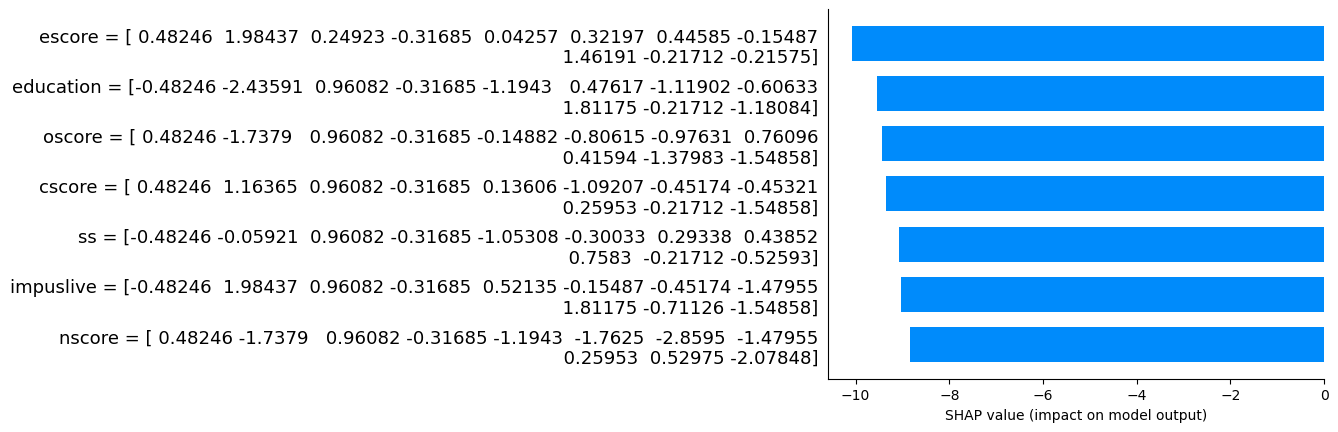

In [20]:
from src.utils.visualisation.deterministic_values import summary_plot, bar_plot, violin_plot
bar_plot(mean_stochastic_shapley_values.T[4], datasets[4], feature_names=feature_names)

If there is no one highest contributing feature, it means some form of feature interaction between the high contributing features are rerseponsible for the group becoming an outlier. 

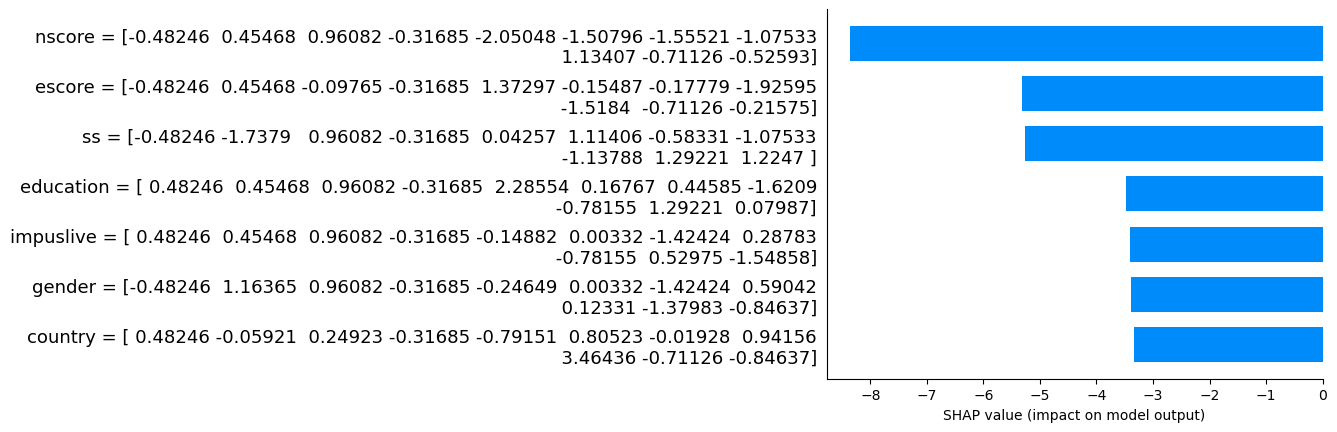

In [21]:
bar_plot(mean_stochastic_shapley_values.T[3], datasets[3], feature_names=feature_names)